다중퍼셉트론 신경망 모델

2121728/2110848 [==============================] - 0s 0us/step
Epoch 1/10
110/110 [==============================] - 14s 118ms/step - loss: 1.9179 - accuracy: 0.5223 - val_loss: 1.4752 - val_accuracy: 0.6534
Epoch 2/10
110/110 [==============================] - 11s 98ms/step - loss: 0.8587 - accuracy: 0.8071 - val_loss: 1.3014 - val_accuracy: 0.7008
Epoch 3/10
110/110 [==============================] - 8s 77ms/step - loss: 0.2802 - accuracy: 0.9479 - val_loss: 1.3155 - val_accuracy: 0.7023
Epoch 4/10
110/110 [==============================] - 8s 76ms/step - loss: 0.1832 - accuracy: 0.9621 - val_loss: 1.3823 - val_accuracy: 0.6882
Epoch 5/10
110/110 [==============================] - 8s 76ms/step - loss: 0.1516 - accuracy: 0.9620 - val_loss: 1.3267 - val_accuracy: 0.7038
Epoch 6/10
110/110 [==============================] - 9s 80ms/step - loss: 0.1320 - accuracy: 0.9636 - val_loss: 1.3571 - val_accuracy: 0.6958
Epoch 7/10
110/110 [==============================] - 8s 76ms/step - loss: 0

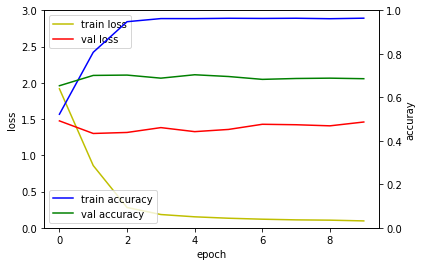

36/36 [==============================] - 1s 14ms/step - loss: 1.5061 - accuracy: 0.6785
## evaluation loss and_metrics ##
[1.506080150604248, 0.6785396337509155]


In [1]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

순환 신경망 모델

Epoch 1/10
110/110 [==============================] - 37s 322ms/step - loss: 2.5072 - accuracy: 0.3677 - val_loss: 2.1370 - val_accuracy: 0.4758
Epoch 2/10
110/110 [==============================] - 35s 320ms/step - loss: 2.0143 - accuracy: 0.5029 - val_loss: 1.9872 - val_accuracy: 0.5419
Epoch 3/10
110/110 [==============================] - 35s 318ms/step - loss: 1.6839 - accuracy: 0.5786 - val_loss: 1.6150 - val_accuracy: 0.5999
Epoch 4/10
110/110 [==============================] - 35s 316ms/step - loss: 1.4759 - accuracy: 0.6327 - val_loss: 1.5347 - val_accuracy: 0.6171
Epoch 5/10
110/110 [==============================] - 34s 312ms/step - loss: 1.2536 - accuracy: 0.6849 - val_loss: 1.4535 - val_accuracy: 0.6468
Epoch 6/10
110/110 [==============================] - 34s 312ms/step - loss: 1.0394 - accuracy: 0.7271 - val_loss: 1.3781 - val_accuracy: 0.6650
Epoch 7/10
110/110 [==============================] - 34s 312ms/step - loss: 0.8719 - accuracy: 0.7741 - val_loss: 1.3957 - val_ac

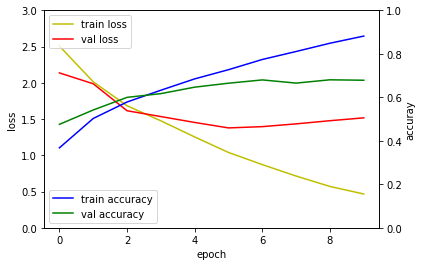

36/36 [==============================] - 3s 91ms/step - loss: 1.7064 - accuracy: 0.6402
## evaluation loss and_metrics ##
[1.7063795328140259, 0.6402493119239807]


In [2]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

컨볼루션 신경망 모델

Epoch 1/10
110/110 [==============================] - 18s 156ms/step - loss: 2.2531 - accuracy: 0.4329 - val_loss: 1.7618 - val_accuracy: 0.5404
Epoch 2/10
110/110 [==============================] - 17s 153ms/step - loss: 1.5878 - accuracy: 0.6143 - val_loss: 1.3771 - val_accuracy: 0.6710
Epoch 3/10
110/110 [==============================] - 17s 153ms/step - loss: 1.2618 - accuracy: 0.6907 - val_loss: 1.2199 - val_accuracy: 0.7104
Epoch 4/10
110/110 [==============================] - 17s 152ms/step - loss: 1.0134 - accuracy: 0.7547 - val_loss: 1.1086 - val_accuracy: 0.7437
Epoch 5/10
110/110 [==============================] - 17s 152ms/step - loss: 0.7795 - accuracy: 0.8064 - val_loss: 1.0609 - val_accuracy: 0.7457
Epoch 6/10
110/110 [==============================] - 17s 152ms/step - loss: 0.5842 - accuracy: 0.8526 - val_loss: 1.0435 - val_accuracy: 0.7563
Epoch 7/10
110/110 [==============================] - 17s 152ms/step - loss: 0.4392 - accuracy: 0.8857 - val_loss: 1.0982 - val_ac

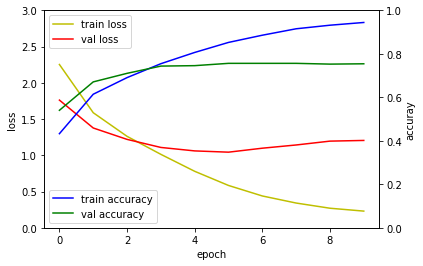

36/36 [==============================] - 1s 30ms/step - loss: 1.2618 - accuracy: 0.7484
## evaluation loss and_metrics ##
[1.2618292570114136, 0.7484416961669922]


In [3]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

순환 컨볼루션 신경망 모델

Epoch 1/10
110/110 [==============================] - 30s 251ms/step - loss: 2.1178 - accuracy: 0.4674 - val_loss: 1.6889 - val_accuracy: 0.5641
Epoch 2/10
110/110 [==============================] - 28s 251ms/step - loss: 1.5638 - accuracy: 0.6011 - val_loss: 1.4790 - val_accuracy: 0.6251
Epoch 3/10
110/110 [==============================] - 27s 249ms/step - loss: 1.2647 - accuracy: 0.6813 - val_loss: 1.2915 - val_accuracy: 0.6892
Epoch 4/10
110/110 [==============================] - 27s 248ms/step - loss: 0.9996 - accuracy: 0.7479 - val_loss: 1.2652 - val_accuracy: 0.6932
Epoch 5/10
110/110 [==============================] - 27s 248ms/step - loss: 0.8012 - accuracy: 0.7987 - val_loss: 1.2612 - val_accuracy: 0.7023
Epoch 6/10
110/110 [==============================] - 27s 249ms/step - loss: 0.6584 - accuracy: 0.8310 - val_loss: 1.2971 - val_accuracy: 0.7018
Epoch 7/10
110/110 [==============================] - 27s 246ms/step - loss: 0.5461 - accuracy: 0.8619 - val_loss: 1.3625 - val_ac

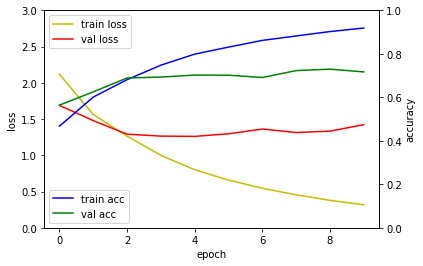

36/36 [==============================] - 2s 57ms/step - loss: 1.5018 - accuracy: 0.7008
## evaluation loss and_metrics ##
[1.5017788410186768, 0.700801432132721]


In [4]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)